# GUI feature in Open CV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1. Module Image file reading and writing
* Read and Write image
* cv.imread(filename) : read image from file , colorspace BGR
* cv.imwrite(filename,image) : save image to a file, colorspace BGR
* Note: matplotlib have colorspace RGB
* If use matplotlib to show image loaf by cv, remember to change color RGB colormap
* cv.imwrite auto change from bgr to rgb while save, remember to change colormap rgb back to bgr if use cv.imwrite

<class 'numpy.ndarray'>


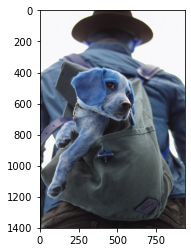

In [2]:
# matplotlib
img = cv2.imread('DATA/raw/dog_backpack.jpg')
plt.imshow(img)
print(type(img))

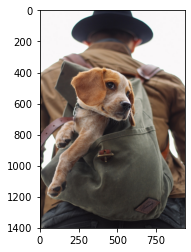

In [3]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [4]:
cv2.imwrite('DATA/proccessed/dog_backpack_1.jpg',img)
cv2.imwrite('DATA/proccessed/dog_backpack_2.jpg',img_rgb)

True

In [5]:
cv2.imwrite('DATA/proccessed/dog_backpack_3.jpg',cv2.cvtColor(img_rgb,cv2.COLOR_RGB2BGR))

True

## 2. Module Image Proccessing

* Drawing Funtion : draw on image
* Image Filtering : Filter on Image
* Color Sapce Conversion and colormap : Change colorspace
* Feature Detection : Find feature of soucrce on destination
* Object Detect by template matching: Find source pic on destination pic
* And still many others

### 2.1 Drawing funtion
* cv2.arrowdLine(img,pt1,pt2,color,thickness) : draw arrow
* cv2.circle(img,center,radius,color,thickness) : draw circle
* cv2.rectangle(img,pt1,pt2,color,thickness) : Draw rectangle
* cv2.line(img,pt1,pt2,color,thickness): draw lines
* cv2.polylines(img,[pts],isClosed,color,thickness)
* cv2.putText(img,text,org,fontFace,fontScale,thickness,color,lineType=cv2.LINE_AA)
* cv2.fillPolys(img,[pts],colors)
* cv2.drawContours(): draw contours

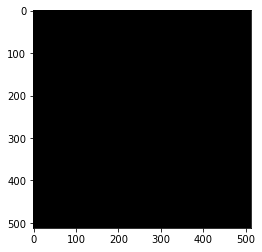

In [6]:
# create blank img
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(blank_img)

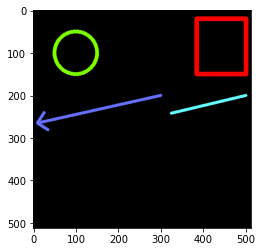

In [7]:
# Draw rectangle 
cv2.rectangle(blank_img,pt1=(384,20),pt2=(500,150),color=(255,0,0),thickness=10)
cv2.circle(img=blank_img,center=(100,100),radius=50,color=(125,255,0),thickness=8)
cv2.line(blank_img,pt1=(500,200),pt2=(324,242),color=(102,255,255),thickness=5)
cv2.arrowedLine(blank_img,pt1=(300,200),pt2=(10,265),color=(102,113,255),thickness=5)
plt.imshow(blank_img)

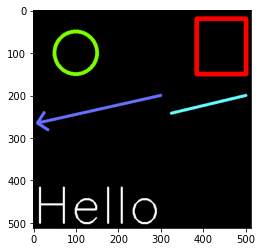

In [8]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img,text='Hello',org=(0,500),fontFace=font,fontScale=4,
            thickness=3,color=(255,255,255),lineType=cv2.LINE_AA)
plt.imshow(blank_img)

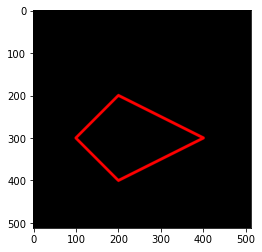

In [9]:
# polygon
blank_img = np.zeros(shape=(512,512,3),dtype=np.int32)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
pts = vertices.reshape((-1,1,2)) # chagng to 3 dim
cv2.polylines(blank_img,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(blank_img)

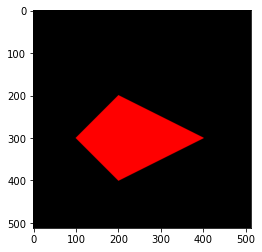

In [10]:
# draw fill-in polygon
blank_img = np.zeros(shape=(512,512,3),dtype=np.int32)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
pts = vertices.reshape((-1,1,2)) # chagng to 3 dim
cv2.fillPoly(blank_img,[pts],color=(255,0,0))
plt.imshow(blank_img)

### 2.2: Colorspace Conversion and colormap
* cv2.cvtColor()


In [11]:
img = cv2.cvtColor(cv2.imread('DATA/raw/dog_backpack.jpg'),cv2.COLOR_BGR2GRAY)

  
# Window name in which image is displayed
window_name = 'image'
  
# Using cv2.imshow() method 
# Displaying the image 
cv2.imshow(window_name, img)
  
#waits for user to press any key 
#(this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0) 
  
#closing all open windows 
cv2.destroyAllWindows() 

### 2.3 Image Filtering
* cv2.blur()
* cv2.dilate()
* cv2.erode()
* cv2.medianBlur()
* cv2.GaussianBlur()

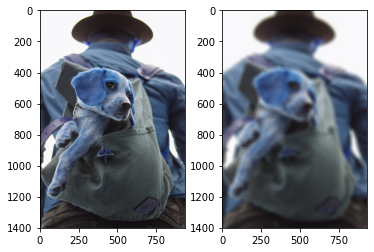

In [21]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
blur = cv2.blur(img,ksize=(30,30))
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

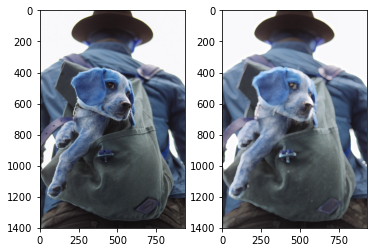

In [25]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
kernel = np.ones((10, 10), 'uint8')
blur = cv2.dilate(img,kernel=kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

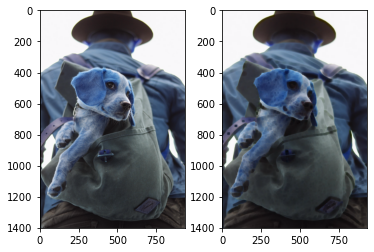

In [28]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
kernel = np.ones((10, 10), 'uint8')
blur = cv2.erode(img,kernel=kernel)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

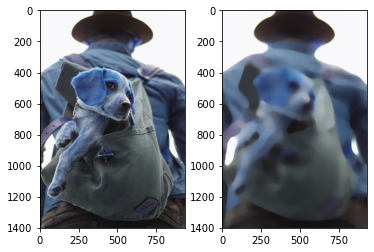

In [42]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
blur = cv2.medianBlur(img,ksize=55) #ksize must be odd int
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

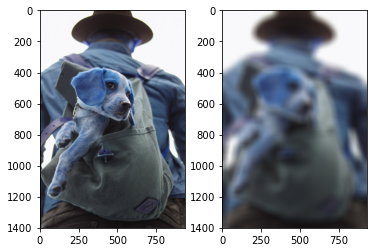

In [41]:
img = cv2.imread('DATA/raw/dog_backpack.jpg')
blur = cv2.GaussianBlur(img,ksize=(55,55),sigmaX=100,sigmaY=100) #ksize must be odd int
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(blur)

In [43]:
flat_chess = cv2.imread('DATA/raw/.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
